**Learn package: [astropy.io.fits](https://docs.astropy.org/en/stable/io/fits/index.html)**

_2021.11.03_

# 打开**FITS**文件

In [12]:
from astropy.io import fits
import matplotlib.pyplot as plt

# * 使用astropy自带的测试文件作为例子
fits_image_filename = fits.util.get_testdata_filepath('test0.fits') # ^ 获取测试文件的路径
print(fits_image_filename)
type(fits_image_filename)

/opt/anaconda3/lib/python3.8/site-packages/astropy/io/fits/tests/data/test0.fits


str

## `fits.open()`打开fits image
**基本概念：**
1. HDU (Header Data Unit): 可以理解成*头*加*数据*单元，是FITS文件的基本结构单元。其中，数据可以是图像数据（多维数组）或table。
2. HDUL (HDU List): HDU对象的集合。可以理解成FITS文件在python中的数据类型，代表了这个FITS文件。1个HDUL包含FITS文件中的全部HDU。


In [2]:
hdul = fits.open(fits_image_filename) # * 返回该FITS文件的HDU List
print(type(hdul))
hdul

<class 'astropy.io.fits.hdu.hdulist.HDUList'>


[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7fbc93fb2bb0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7fbc95701f10>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7fbc95717130>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7fbc95717190>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7fbc957174f0>]

## `hdul.info()`查看FITS文件信息

In [3]:
hdul.info() # * 展示打开的这个FITS文件信息

Filename: /opt/anaconda3/lib/python3.8/site-packages/astropy/io/fits/tests/data/test0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     138   ()      
  1  SCI           1 ImageHDU        61   (40, 40)   int16   
  2  SCI           2 ImageHDU        61   (40, 40)   int16   
  3  SCI           3 ImageHDU        61   (40, 40)   int16   
  4  SCI           4 ImageHDU        61   (40, 40)   int16   


## `hdul.close()`关闭FITS文件

In [4]:
#hdul.close() # * 关闭FITS文件

# 提取hdu的头信息和数据
一个HDUList包含若干个HDU，可以使用`.header`和`.data`分别提取hdu的头信息和数据


In [5]:
type(hdul[0])

astropy.io.fits.hdu.image.PrimaryHDU

In [6]:
type(hdul[0].header) # * 可见，该属性操作是对hdu进行实例化

astropy.io.fits.header.Header

In [7]:
type(hdul[1].data) # * 可见，该属性操作是对hdu进行实例化

numpy.ndarray

In [8]:
hdul[1].header

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                   40 / length of data axis 1                          
NAXIS2  =                   40 / length of data axis 2                          
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
EXTNAME = 'SCI     '           / extension name                                 
EXTVER  =                    1 / extension version number                       
INHERIT =                    T / inherit the primary header                     
ROOTNAME= 'U2EQ0201T'          / rootname of the observation set                
EXPNAME = 'U2EQ0201T'          / 9 character exposure identifier                
CRVAL1  =        215.5971675

# FITS Header的索引与编辑

In [9]:
hdul[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
GROUPS  =                    F / data has groups                                
NEXTEND =                    4 / Number of standard extensions                  
BSCALE  =           1.000000E0 / REAL = TAPE*BSCALE + BZERO                     
BZERO   =           3.276800E4 /                                                
ORIGIN  = 'NOAO-IRAF FITS Image Kernel Aug 1 1997' / FITS file originator       
DATE    = '01/04/99  '         / Date FITS file was generated                   
IRAF-TLM= 'xxx     '              / Time of last modification                   
                                                                                
              / GROUP PARAME

## 头信息的索引

# 显示图片

In [13]:
hdul.info()

Filename: /opt/anaconda3/lib/python3.8/site-packages/astropy/io/fits/tests/data/test0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     138   ()      
  1  SCI           1 ImageHDU        61   (40, 40)   int16   
  2  SCI           2 ImageHDU        61   (40, 40)   int16   
  3  SCI           3 ImageHDU        61   (40, 40)   int16   
  4  SCI           4 ImageHDU        61   (40, 40)   int16   


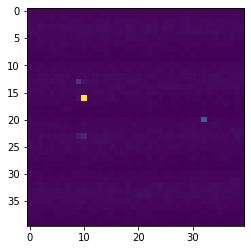

In [17]:
data = hdul[4].data
plt.imshow(data)